In [31]:
using CSV, DataFrames, Statistics
using PyPlot # plotting library
using PyCall
using Printf
using FStrings
using LaTeXStrings # for L"$x$" to work instead of needing to do "\$x\$"

# check out all of the styles! https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
PyPlot.matplotlib.style.use("seaborn-pastel")

# change settings for all plots at once, e.g. font size
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["font.size"] = 16

#make jupyter notebook print more dataframe columns
ENV["COLUMNS"]=160

# important attributes for this analysis
hand = "2v2"
subjects = ["sub1", "sub2", "sub3"]
t_labels = ["a", "b", "c", "d", "e", "f", "g", "h"]
rotations = ["n"]
translations = ['a','b','c','d','e','f','g','h']

metrics = [:dist, :arc_len, :area_btwn, :max_a_loc, :max_a_reg, :max_err, :mvt_eff, :t_fd, :r_fd]
metric_sds = [:dist_sd, :arc_len, :area_btwn_sd, :max_a_loc_sd, :max_a_reg_sd, :max_err_sd, :mvt_eff_sd, :t_fd_sd, :r_fd_sd]

metric_to_color = Dict(:dist=>"xkcd:tan", :arc_len=>"xkcd:light blue", :area_btwn=>"xkcd:dark red", :max_a_loc=>"xkcd:light green", :max_a_reg=>"xkcd:dark green", :max_err=>"xkcd:blue grey", :mvt_eff=>"xkcd:dark orange", :r_fd=>"xkcd:red brown", :t_fd=>"xkcd:brown")


print("Ready to go!")

Ready to go!

-----

# Reading in the Data
Now reading in the metrics data for 2v2.

In [32]:
df_hand = CSV.read(f"results/{hand}_metrics.csv", DataFrame, copycols=true)
df_hand_avg = CSV.read(f"results/{hand}_avg_metrics.csv", DataFrame, copycols=true)
df_hand_std = CSV.read(f"results/{hand}_metric_sds.csv", DataFrame, copycols=true)
first(df_hand, 23)

,trial,arc_len,area_btwn,dist,max_a_loc,max_a_reg,max_err,mvt_eff,r_fd,t_fd
,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,sub1_2v2_a_n_1,0.775696,0.0169579,0.363636,0.654545,0.00276525,0.0302954,0.468787,5.9201,0.0235679
2,sub1_2v2_a_n_2,0.711686,0.0198878,0.358586,0.652626,0.00262913,0.0281023,0.503854,8.1757,0.0203259
3,sub1_2v2_a_n_3,0.778182,0.0192159,0.373737,0.672727,0.00443016,0.0400934,0.48027,5.9373,0.0312973
4,sub1_2v2_a_n_4,0.669408,0.0189096,0.388889,0.7,0.00374335,0.0360019,0.580944,4.4391,0.0300547
5,sub1_2v2_a_n_5,0.824575,0.0246574,0.388889,0.7,0.00403135,0.0435376,0.471624,6.4339,0.035901
6,sub2_2v2_a_n_1,0.585836,0.00862961,0.313131,0.563636,0.00161067,0.0281649,0.534504,5.7871,0.0207424
7,sub2_2v2_a_n_2,1.15544,0.0390603,0.232323,0.422828,0.00262895,0.0280413,0.20107,6.2156,0.144379
8,sub2_2v2_a_n_3,1.03915,0.0395221,0.262626,0.47798,0.00233266,0.021556,0.252731,6.2639,0.0858591
9,sub2_2v2_a_n_4,0.649367,0.0111279,0.323232,0.581818,0.00228409,0.0506647,0.497765,5.5202,0.045428


In [33]:
# breaking out important info from the trial id for easier data access

function condition_df(df::DataFrame)
    subject_nums = []
    translation_labels = []
    numbers = []
    for row in eachrow(df)
        label = row[:trial]
        #sub1_2v2_a_n_1
    #     push!(subject_nums, x[4])
    #     push!(translation_labels,x[10])
    #     push!(numbers, x[14])
        x = split(label, "_")
        push!(subject_nums, x[1][4])
        push!(translation_labels, x[3][1])
        push!(numbers, x[5][1])
    end
    s = convert(Array{Char,1}, subject_nums)
    d = convert(Array{Char,1}, translation_labels)
    n = convert(Array{Char,1}, numbers)

    insertcols!(df, 2, :subj=>s)
    insertcols!(df, 3, :dir=>d)
    insertcols!(df, 4, :num=>n)
end

condition_df(df_hand)
condition_df(df_hand_avg)
condition_df(df_hand_std)

first(df_hand, 2)

,trial,subj,dir,num,arc_len,area_btwn,dist,max_a_loc,max_a_reg,max_err,mvt_eff,r_fd,t_fd
,String,Char,Char,Char,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,sub1_2v2_a_n_1,1,a,1,0.775696,0.0169579,0.363636,0.654545,0.00276525,0.0302954,0.468787,5.9201,0.0235679
2,sub1_2v2_a_n_2,1,a,2,0.711686,0.0198878,0.358586,0.652626,0.00262913,0.0281023,0.503854,8.1757,0.0203259


## Asterisk Plot

![Avg Asterisk](./pics/avgd_2v2_3subs_n.jpg)

-----

# Histograms of Metrics
Now I will produce histogram plots of the metrics to see what kind of a distribution we get for all the trials.
Shamelessly taken from my previous datascience course at: [link](https://github.com/SimonEnsemble/data_science_course)

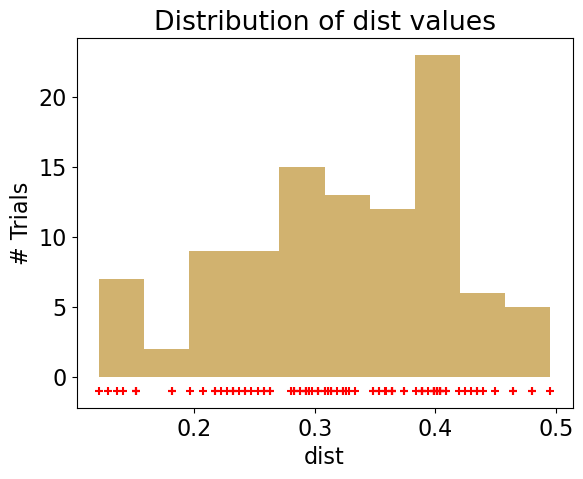

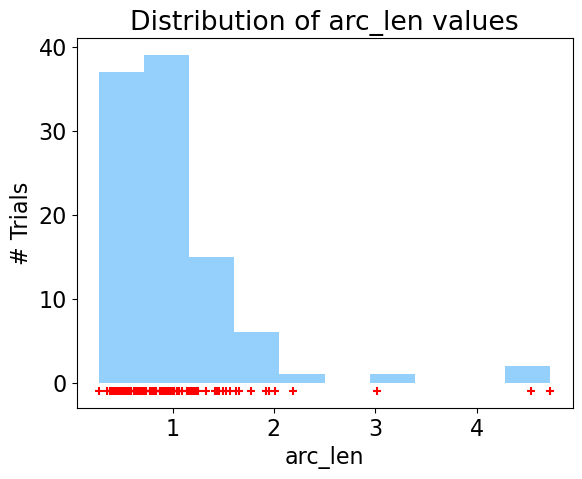

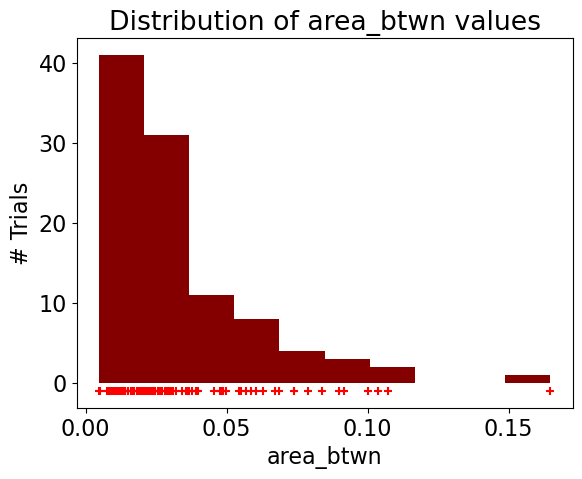

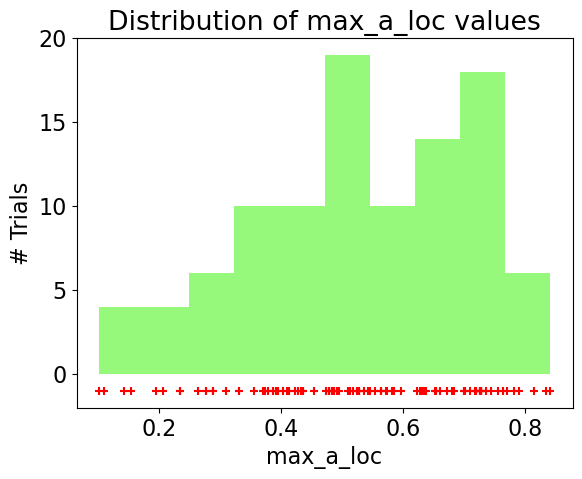

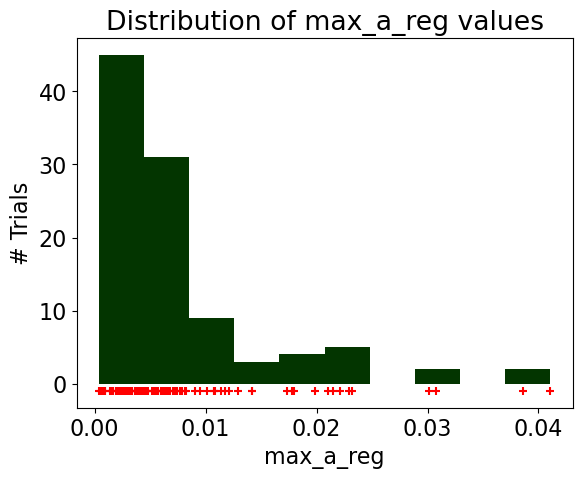

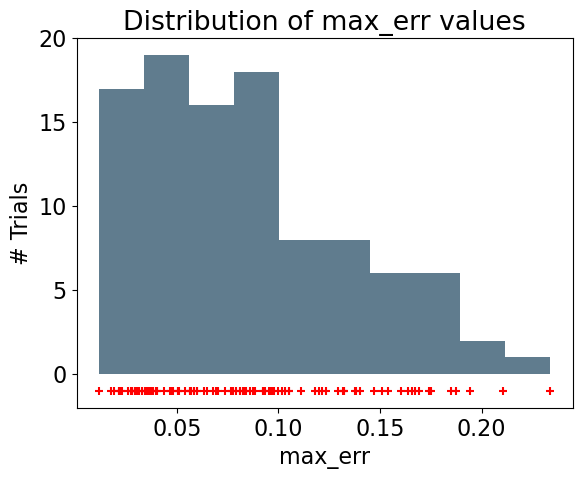

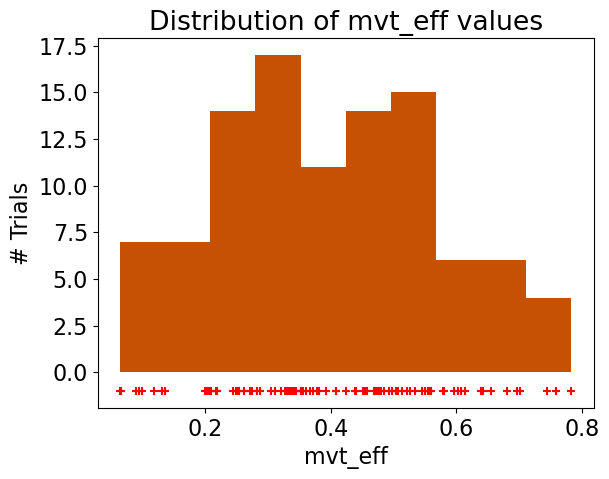

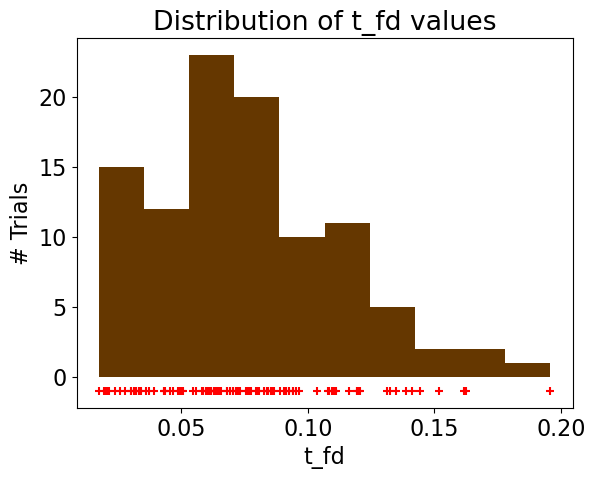

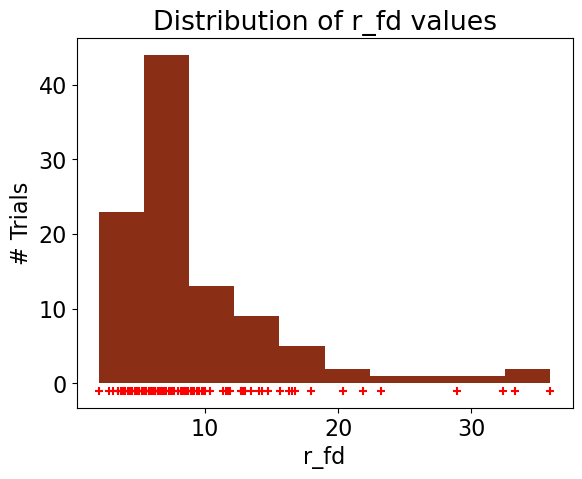

In [34]:

for m in metrics
    figure()
    hist(df_hand[:, m], color=metric_to_color[m]) #, normed=true)
    scatter(df_hand[:, m], [-1 for i = 1:nrow(df_hand)], marker="+", color="r")
    xlabel(f"{m}")
    ylabel("# Trials")
    title(f"Distribution of {m} values")
end

### Observations of Histogram Plots
Based on what I see, here are the observations per metric (in order of appearance top to down):
* **total distance**: values are distributed
* **arc length**: mostly concentrated at low arc lengths
* **max area region location**: mostly, the region of max error area is most commonly found at the end
* **max area region**: at the locations of max error area, the area of error (aka the area between the path and the target line) is still relatively low
* **max error**: values are distributed
* **movement efficiency**: values are distributed
* **rotational frechet distance**: aka max rotation error. Mostly low, but larger distribution at the low end
* translational frechet distance: all values are very low

----

# Metric Values by direction
Plot all metric values in bar charts by direction

In [35]:
# groups = groupby(df_hand, :dir)
# a_df = groups[1]
# b_df = groups[2]
# c_df = groups[3]
# d_df = groups[4]
# e_df = groups[5]
# f_df = groups[6]
# g_df = groups[7]
# h_df = groups[8]
# directions = [a_df, b_df, c_df, d_df, e_df, f_df, g_df, h_df]
# a_df

In [36]:
function compare_metrics(metric::Symbol, df::DataFrame) 
    dir_data = groupby(df, :dir)
    metric_data = []
    
    for dir in dir_data
        data = dir[!, metric]
        push!(metric_data, data)
    end
    plt_title = f"{hand}: {metric}"
    boxplot(metric_data)
    title(plt_title)
    xticks(1:8, t_labels)
    xlabel("Trial Directions")
end

println("Functions are ready!")

Functions are ready!


In [37]:
subjects = ["sub1", "sub2", "sub3"]
translations = ['a','b','c','d','e','f','g','h']
rotations = ["n"]

function get_trial_vals(df::DataFrame, metric::Symbol, translation::Char)
    desired_direction = filter(row -> row[:dir] == translation, df)
    names = desired_direction[!, :trial]
    values = desired_direction[!, metric]
    v = convert(Array{Float64,1}, values)  # just in case
    
    return v, names
end

function get_sd_vals(df::DataFrame, metric::Symbol, translation::Char)
    desired_direction = filter(row -> row[:dir] == translation, df)
    names = desired_direction[!, :trial]
    values = desired_direction[!, metric]
    v = convert(Array{Float64,1}, values)  # just in case
    
    return v, names
end

print("Functions are ready!")

Functions are ready!

-----

# Average Line Calculations

#### Dir: A
![Average Debug Plot for direction A](./pics/avgdebug_2v2_3subs_a_n.jpg)

#### Dir: B
![Average Debug Plot for direction B](./pics/avgdebug_2v2_3subs_b_n.jpg)

#### Dir: C
![Average Debug Plot for direction C](./pics/avgdebug_2v2_3subs_c_n.jpg)

#### Dir: D
![Average Debug Plot for direction D](./pics/avgdebug_2v2_3subs_d_n.jpg)

#### Dir: E
![Average Debug Plot for direction E](./pics/avgdebug_2v2_3subs_e_n.jpg)

#### Dir: F
![Average Debug Plot for direction F](./pics/avgdebug_2v2_3subs_f_n.jpg)

#### Dir: G
![Average Debug Plot for direction G](./pics/avgdebug_2v2_3subs_g_n.jpg)

#### Dir: H
![Average Debug Plot for direction H](./pics/avgdebug_2v2_3subs_h_n.jpg)


----

# Listing the Metric Values with standard deviations

In [38]:
first(df_hand_avg, 10)

,trial,subj,dir,num,arc_len,area_btwn,dist,max_a_loc,max_a_reg,max_err,mvt_eff,r_fd,t_fd
,String,Char,Char,Char,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,"{'sub1', 'sub2', 'sub3'}_2v2_a_n_1",u,a,1,0.941574,0.0246939,0.351515,0.628572,0.00367996,0.0334102,0.403936,5.86371,0.0481357
2,"{'sub1', 'sub2', 'sub3'}_2v2_b_n_1",u,b,1,0.787635,0.0322428,0.346847,0.606127,0.00720555,0.105736,0.493833,6.61363,0.0731029
3,"{'sub1', 'sub2', 'sub3'}_2v2_c_n_1",u,c,1,0.817955,0.0282864,0.36685,0.552397,0.0095696,0.131695,0.516356,8.90217,0.0902846
4,"{'sub1', 'sub2', 'sub3'}_2v2_d_n_1",u,d,1,1.76005,0.0499393,0.233731,0.369746,0.00778637,0.0651479,0.208018,18.7949,0.0896959
5,"{'sub1', 'sub2', 'sub3'}_2v2_e_n_2",u,e,2,0.853141,0.022731,0.252525,0.32452,0.00353271,0.0394017,0.336152,7.48376,0.0487139
6,"{'sub1', 'sub2', 'sub3'}_2v2_f_n_1",u,f,1,1.08128,0.0392836,0.286233,0.486978,0.0100248,0.0917139,0.299148,13.2107,0.095772
7,"{'sub1', 'sub2', 'sub3'}_2v2_g_n_2",u,g,2,1.22738,0.0473111,0.345377,0.543162,0.0131871,0.0863872,0.342274,9.81779,0.0888085
8,"{'sub1', 'sub2', 'sub3'}_2v2_h_n_1",u,h,1,0.756182,0.0276999,0.362337,0.61691,0.00820481,0.119692,0.511524,7.43073,0.0834681


In [39]:
first(df_hand_std, 10)

,trial,subj,dir,num,arc_len,area_btwn,dist,max_a_loc,max_a_reg,max_err,mvt_eff,r_fd,t_fd
,String,Char,Char,Char,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,"{'sub1', 'sub2', 'sub3'}_2v2_a_n_1",u,a,1,0.285439,0.011271,0.0529958,0.0912272,0.00137191,0.00693986,0.118496,1.21697,0.0333108
2,"{'sub1', 'sub2', 'sub3'}_2v2_b_n_1",u,b,1,0.273366,0.0162092,0.0518958,0.0935221,0.00355159,0.0480052,0.165883,1.84778,0.0244149
3,"{'sub1', 'sub2', 'sub3'}_2v2_c_n_1",u,c,1,0.445701,0.026077,0.0970594,0.154933,0.00960311,0.0512054,0.14495,2.51342,0.0256069
4,"{'sub1', 'sub2', 'sub3'}_2v2_d_n_1",u,d,1,1.40895,0.0435398,0.0586336,0.0897654,0.00589649,0.0301443,0.140425,9.64635,0.0411513
5,"{'sub1', 'sub2', 'sub3'}_2v2_e_n_2",u,e,2,0.432358,0.0145322,0.0965393,0.16515,0.00586189,0.0204317,0.140224,4.09892,0.0280833
6,"{'sub1', 'sub2', 'sub3'}_2v2_f_n_1",u,f,1,0.362427,0.0262683,0.066587,0.139234,0.00960669,0.040416,0.117399,9.62559,0.0395077
7,"{'sub1', 'sub2', 'sub3'}_2v2_g_n_2",u,g,2,0.73201,0.0365659,0.0977432,0.217345,0.0121348,0.0363244,0.116251,3.7985,0.0371935
8,"{'sub1', 'sub2', 'sub3'}_2v2_h_n_1",u,h,1,0.232822,0.0132422,0.0573396,0.140547,0.00474727,0.046142,0.131583,2.58915,0.0215084


In [79]:
function print_avg_and_std(metric::Symbol)
    translations = ['a','b','c','d','e','f','g','h']
    #translations = ['f']
    # made another metric list so it matches the order for the figure in the paper
    metric_list = [:dist, :arc_len, :mvt_eff, :max_err, :t_fd, :area_btwn, :max_a_reg, :max_a_loc, :r_fd]

    for i in range(1,9, step=1)
        println(" ")
        println(f"{metric_list[i]} metric")
        
        for t in translations
            vals, _ = get_trial_vals(df_hand_avg, metric_list[i], t)
            stds, _ = get_trial_vals(df_hand_std, metric_list[i], t)


            for i in range(1,length(vals), step=1)
                v = round(vals[i], digits=2)
                s = round(stds[i], digits=2)
                println(f"Dir {t}: {v} +/- {s}")

            end

#            print(t)
#            print(": ")
#            print(vals)
#            print(" | ")
#            println(stds)
        end
    end
end

print_avg_and_std(:t_fd)

 
dist metric
Dir a: 0.35 +/- 0.05
Dir b: 0.35 +/- 0.05
Dir c: 0.37 +/- 0.1
Dir d: 0.23 +/- 0.06
Dir e: 0.25 +/- 0.1
Dir f: 0.29 +/- 0.07
Dir g: 0.35 +/- 0.1
Dir h: 0.36 +/- 0.06
 
arc_len metric
Dir a: 0.94 +/- 0.29
Dir b: 0.79 +/- 0.27
Dir c: 0.82 +/- 0.45
Dir d: 1.76 +/- 1.41
Dir e: 0.85 +/- 0.43
Dir f: 1.08 +/- 0.36
Dir g: 1.23 +/- 0.73
Dir h: 0.76 +/- 0.23
 
mvt_eff metric
Dir a: 0.4 +/- 0.12
Dir b: 0.49 +/- 0.17
Dir c: 0.52 +/- 0.14
Dir d: 0.21 +/- 0.14
Dir e: 0.34 +/- 0.14
Dir f: 0.3 +/- 0.12
Dir g: 0.34 +/- 0.12
Dir h: 0.51 +/- 0.13
 
max_err metric
Dir a: 0.03 +/- 0.01
Dir b: 0.11 +/- 0.05
Dir c: 0.13 +/- 0.05
Dir d: 0.07 +/- 0.03
Dir e: 0.04 +/- 0.02
Dir f: 0.09 +/- 0.04
Dir g: 0.09 +/- 0.04
Dir h: 0.12 +/- 0.05
 
t_fd metric
Dir a: 0.05 +/- 0.03
Dir b: 0.07 +/- 0.02
Dir c: 0.09 +/- 0.03
Dir d: 0.09 +/- 0.04
Dir e: 0.05 +/- 0.03
Dir f: 0.1 +/- 0.04
Dir g: 0.09 +/- 0.04
Dir h: 0.08 +/- 0.02
 
area_btwn metric
Dir a: 0.02 +/- 0.01
Dir b: 0.03 +/- 0.02
Dir c: 0.03 +/- 0.03
Dir d

# T Tests for Symmetry

In [41]:
using HypothesisTests

In [42]:
function compare_2_directions(metric::Symbol)
    translations = ['a','b','c','d','e','f','g','h']
    results_report = zeros(8, 8)
    
    for t in translations
        i = findall(x->x==t, translations)[1]
        n = 0
        
        for t2 in translations[i:end]
            v1, _ = get_trial_vals(df_hand, metric, t)
            v2, _ = get_trial_vals(df_hand, metric, t2)
            
            result = pvalue(UnequalVarianceTTest(v1, v2))
            r = round(result, digits=4)
            results_report[i, i+n] = r
            
            n = n+1
        end
        println(" ")
    end

    r_df = DataFrame(trials=translations = ["a", "b", "c", "d", "e", "f", "g", "h"], 
                     a=results_report[1,:], b=results_report[2,:], c=results_report[3,:],
                     d=results_report[4,:], e=results_report[5,:], f=results_report[6,:],
                     g=results_report[7,:], h=results_report[8,:])
    
    return r_df
end

# temp = compare_2_directions(:arc_len)
println("Functions are ready!")

Functions are ready!


In [43]:
# for m in metrics
#     maxes = []
#     mins = []
#     r = compare_2_directions(m)
    
#     println(f"{m} data")
#     println("   ")
#     println(r)
#     println("================================================")
#     println("    ")
# end

----

# Data Analysis 

![Avg Asterisk](./pics/avgd_2v2_3subs_n.jpg)

**Hypotheses:**
* df

### Total Distance Travelled


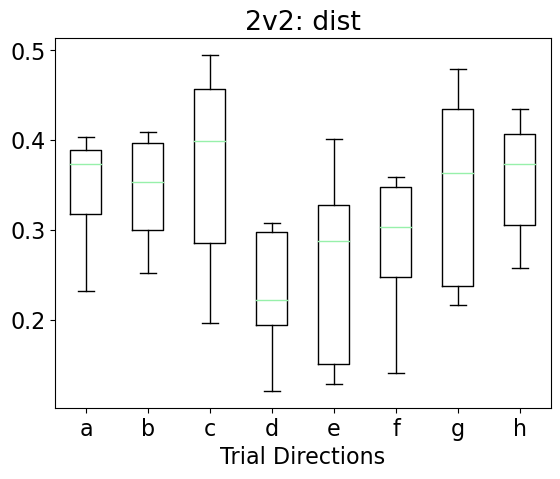

,trials,a,b,c,d,e,f,g,h
,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,a,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,b,0.8156,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,c,0.6569,0.562,1.0,0.0,0.0,0.0,0.0,0.0
4,d,0.0001,0.0001,0.0018,1.0,0.0,0.0,0.0,0.0
5,e,0.0075,0.0099,0.0134,0.5926,1.0,0.0,0.0,0.0
6,f,0.0325,0.0441,0.052,0.0988,0.3792,1.0,0.0,0.0
7,g,0.848,0.9632,0.6118,0.0035,0.0316,0.1232,1.0,0.0
8,h,0.6081,0.4599,0.8971,0.0,0.0039,0.0164,0.6036,1.0


In [44]:
compare_metrics(:dist, df_hand)
compare_2_directions(:dist)

### Arc Length

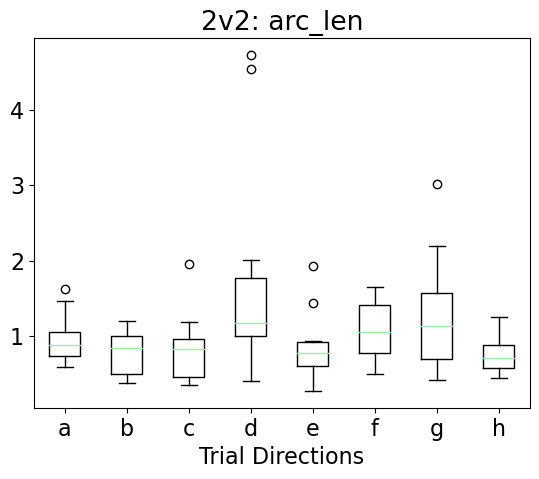

,trials,a,b,c,d,e,f,g,h
,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,a,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,b,0.1562,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,c,0.4519,0.851,1.0,0.0,0.0,0.0,0.0,0.0
4,d,0.0986,0.0553,0.0668,1.0,0.0,0.0,0.0,0.0
5,e,0.5654,0.6665,0.8564,0.0751,1.0,0.0,0.0,0.0
6,f,0.3651,0.0675,0.1838,0.1697,0.2275,1.0,0.0,0.0
7,g,0.2225,0.0682,0.1225,0.2978,0.1476,0.5615,1.0,0.0
8,h,0.0705,0.7456,0.6946,0.0488,0.5117,0.0418,0.0504,1.0


In [45]:
compare_metrics(:arc_len, df_hand)
compare_2_directions(:arc_len)

### Movement Efficiency
total_distance / arc_length

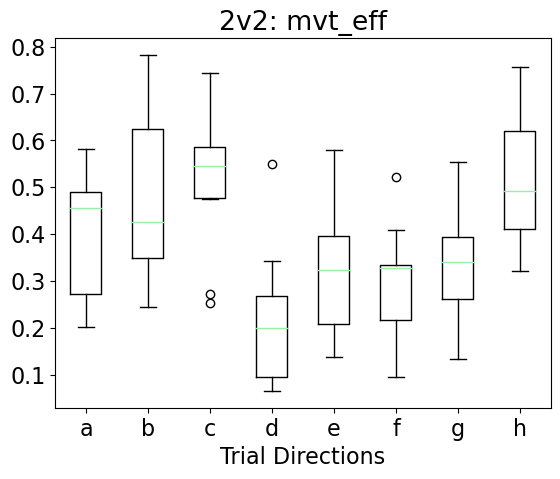

,trials,a,b,c,d,e,f,g,h
,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,a,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,b,0.1113,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,c,0.0581,0.7272,1.0,0.0,0.0,0.0,0.0,0.0
4,d,0.0019,0.0001,0.0001,1.0,0.0,0.0,0.0,0.0
5,e,0.2131,0.0164,0.0089,0.0491,1.0,0.0,0.0,0.0
6,f,0.0611,0.0042,0.0025,0.1512,0.5398,1.0,0.0,0.0
7,g,0.1932,0.0115,0.0064,0.0259,0.9107,0.4303,1.0,0.0
8,h,0.031,0.757,0.9342,0.0,0.0041,0.001,0.0018,1.0


In [46]:
compare_metrics(:mvt_eff, df_hand)
compare_2_directions(:mvt_eff)

### Max Error

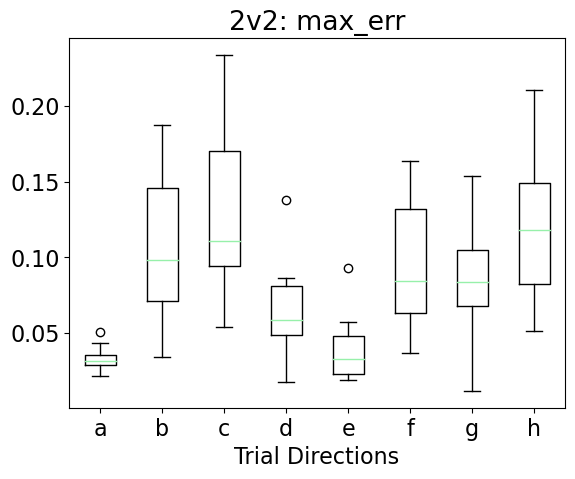

,trials,a,b,c,d,e,f,g,h
,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,a,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,b,0.0001,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,c,0.0001,0.2229,1.0,0.0,0.0,0.0,0.0,0.0
4,d,0.0077,0.0181,0.0027,1.0,0.0,0.0,0.0,0.0
5,e,0.3687,0.0002,0.0001,0.0363,1.0,0.0,0.0,0.0
6,f,0.0035,0.4742,0.0806,0.1436,0.0064,1.0,0.0,0.0
7,g,0.0003,0.2537,0.0308,0.1481,0.001,0.7677,1.0,0.0
8,h,0.0,0.4395,0.562,0.0019,0.0,0.1551,0.0499,1.0


In [47]:
compare_metrics(:max_err, df_hand)
compare_2_directions(:max_err)

### Translational Frechet Distance

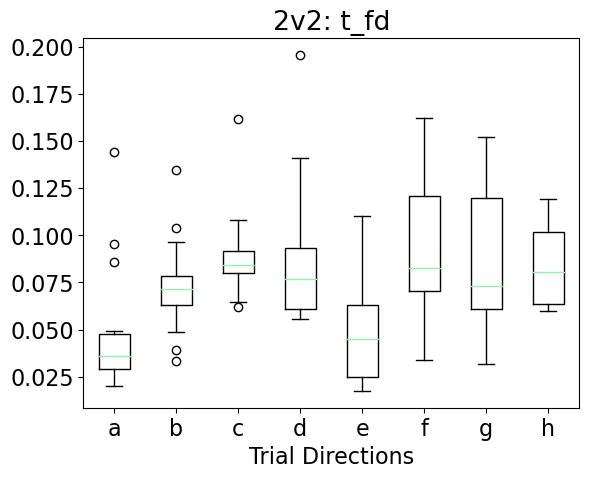

,trials,a,b,c,d,e,f,g,h
,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,a,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,b,0.0324,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,c,0.0018,0.1134,1.0,0.0,0.0,0.0,0.0,0.0
4,d,0.0165,0.2723,0.9698,1.0,0.0,0.0,0.0,0.0
5,e,0.9628,0.0326,0.0019,0.017,1.0,0.0,0.0,0.0
6,f,0.0119,0.1681,0.7393,0.7541,0.0124,1.0,0.0,0.0
7,g,0.0075,0.2256,0.9136,0.9586,0.0077,0.6977,1.0,0.0
8,h,0.0028,0.2434,0.5007,0.6683,0.0029,0.433,0.6661,1.0


In [48]:
compare_metrics(:t_fd, df_hand)
compare_2_directions(:t_fd)

### Max Rotation Error / Rotational Frechet Distance

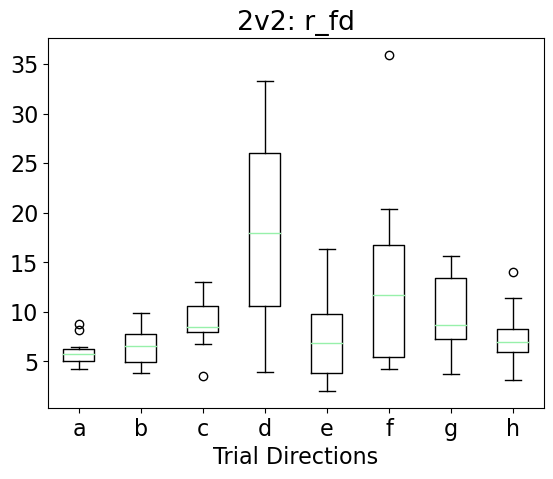

,trials,a,b,c,d,e,f,g,h
,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,a,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,b,0.2168,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,c,0.0035,0.0254,1.0,0.0,0.0,0.0,0.0,0.0
4,d,0.0017,0.0025,0.0091,1.0,0.0,0.0,0.0,0.0
5,e,0.228,0.5235,0.3468,0.0043,1.0,0.0,0.0,0.0
6,f,0.0633,0.0899,0.2493,0.2383,0.1444,1.0,0.0,0.0
7,g,0.0038,0.0165,0.5064,0.0164,0.1715,0.3657,1.0,0.0
8,h,0.0538,0.3456,0.1766,0.0039,0.9706,0.1317,0.08,1.0


In [49]:
compare_metrics(:r_fd, df_hand)
compare_2_directions(:r_fd)

### Total Area Between Curves
Between object path and target line

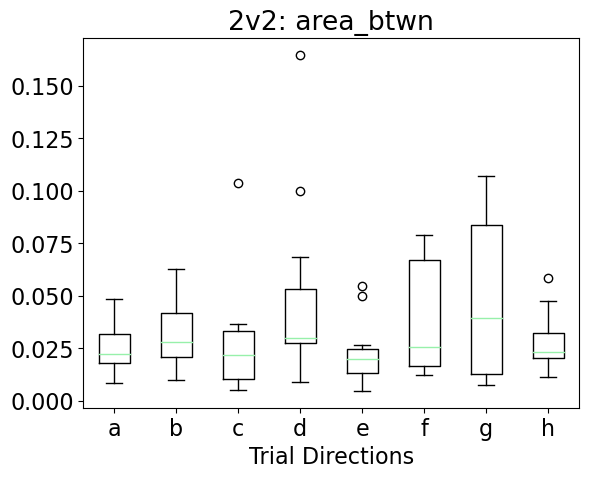

,trials,a,b,c,d,e,f,g,h
,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,a,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,b,0.1649,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,c,0.6892,0.6769,1.0,0.0,0.0,0.0,0.0,0.0
4,d,0.1009,0.2437,0.1957,1.0,0.0,0.0,0.0,0.0
5,e,0.7158,0.1354,0.5606,0.0841,1.0,0.0,0.0,0.0
6,f,0.1669,0.5056,0.3882,0.5298,0.134,1.0,0.0,0.0
7,g,0.0585,0.2052,0.1699,0.8811,0.0472,0.5744,1.0,0.0
8,h,0.5232,0.4239,0.9488,0.1452,0.387,0.2699,0.0989,1.0


In [50]:
compare_metrics(:area_btwn, df_hand)
compare_2_directions(:area_btwn)

### Max Area Region
The area between the curves of a scrolling window of about 20% total_distance width.

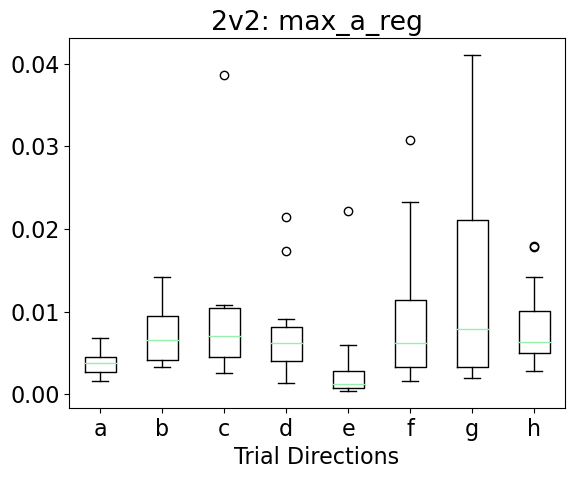

,trials,a,b,c,d,e,f,g,h
,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,a,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,b,0.0027,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,c,0.0822,0.4718,1.0,0.0,0.0,0.0,0.0,0.0
4,d,0.0541,0.7851,0.6234,1.0,0.0,0.0,0.0,0.0
5,e,0.9363,0.0846,0.1048,0.1128,1.0,0.0,0.0,0.0
6,f,0.0995,0.4441,0.9216,0.5736,0.1152,1.0,0.0,0.0
7,g,0.019,0.122,0.4435,0.1903,0.0244,0.5245,1.0,0.0
8,h,0.0034,0.5338,0.6849,0.8548,0.0436,0.6263,0.2009,1.0


In [51]:
compare_metrics(:max_a_reg, df_hand)
compare_2_directions(:max_a_reg)

### Max Area Location
The location of the center of the max area region, represented as a percentage along the full target line (that is, some percentage of 0.5).

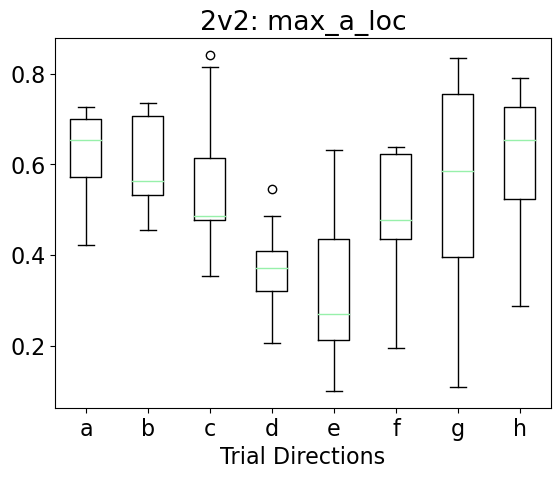

,trials,a,b,c,d,e,f,g,h
,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,a,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,b,0.5256,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,c,0.1843,0.344,1.0,0.0,0.0,0.0,0.0,0.0
4,d,0.0,0.0,0.0053,1.0,0.0,0.0,0.0,0.0
5,e,0.0,0.0001,0.0037,0.4408,1.0,0.0,0.0,0.0
6,f,0.0242,0.0515,0.3589,0.0596,0.0319,1.0,0.0,0.0
7,g,0.2231,0.3652,0.9087,0.0224,0.0122,0.4892,1.0,0.0
8,h,0.7967,0.8131,0.3084,0.0,0.0001,0.0513,0.3253,1.0


In [52]:
compare_metrics(:max_a_loc, df_hand)
compare_2_directions(:max_a_loc)

-----

## Comparing PValues Directly, Direction to Direction, all Metrics

In [54]:
translations = ['a','b','c','d','e','f','g','h']
results_report = zeros(8, 8)

for t in translations
    i = findall(x->x==t, translations)[1]
    n = 0

    for t2 in translations[(i+1):end]
        println(f"{t} v {t2}")
        for m in metrics
            v1, _ = get_trial_vals(df_hand, m, t)
            v2, _ = get_trial_vals(df_hand, m, t2)

            result = pvalue(UnequalVarianceTTest(v1, v2))
            r = round(result, digits=4)
            println(f"{m} => {r}")
        end

        println("  ")
    end
    println("====================")
end

a v b
dist => 0.8156
arc_len => 0.1562
area_btwn => 0.1649
max_a_loc => 0.5256
max_a_reg => 0.0027
max_err => 0.0001
mvt_eff => 0.1113
t_fd => 0.0324
r_fd => 0.2168
  
a v c
dist => 0.6569
arc_len => 0.4519
area_btwn => 0.6892
max_a_loc => 0.1843
max_a_reg => 0.0822
max_err => 0.0001
mvt_eff => 0.0581
t_fd => 0.0018
r_fd => 0.0035
  
a v d
dist => 0.0001
arc_len => 0.0986
area_btwn => 0.1009
max_a_loc => 0.0
max_a_reg => 0.0541
max_err => 0.0077
mvt_eff => 0.0019
t_fd => 0.0165
r_fd => 0.0017
  
a v e
dist => 0.0075
arc_len => 0.5654
area_btwn => 0.7158
max_a_loc => 0.0
max_a_reg => 0.9363
max_err => 0.3687
mvt_eff => 0.2131
t_fd => 0.9628
r_fd => 0.228
  
a v f
dist => 0.0325
arc_len => 0.3651
area_btwn => 0.1669
max_a_loc => 0.0242
max_a_reg => 0.0995
max_err => 0.0035
mvt_eff => 0.0611
t_fd => 0.0119
r_fd => 0.0633
  
a v g
dist => 0.848
arc_len => 0.2225
area_btwn => 0.0585
max_a_loc => 0.2231
max_a_reg => 0.019
max_err => 0.0003
mvt_eff => 0.1932
t_fd => 0.0075
r_fd => 0.0038
  
a

In [55]:
function aggregate_pvalues()
    translations = ['a','b','c','d','e','f','g','h']
    results_report = zeros(8, 8)
    
    for t in translations
        i = findall(x->x==t, translations)[1]
        n = 0
        
        for t2 in translations[i:end]
            total_sigs = 0
            
            for m in metrics
                v1, _ = get_trial_vals(df_hand, m, t)
                v2, _ = get_trial_vals(df_hand, m, t2)

                result = pvalue(UnequalVarianceTTest(v1, v2))
                
                if result <= 0.05
                    total_sigs = total_sigs + 1
                end
                
                if t == t2
                    total_sigs = NaN
                end
            end
            perc_sigs = total_sigs / length(metrics)
            results_report[i, i+n] = perc_sigs
            
            n = n+1
        end
        println(" ")
    end

    r_df = DataFrame(trials=translations = ["a", "b", "c", "d", "e", "f", "g", "h"], 
                     a=results_report[1,:], b=results_report[2,:], c=results_report[3,:],
                     d=results_report[4,:], e=results_report[5,:], f=results_report[6,:],
                     g=results_report[7,:], h=results_report[8,:])
    
    return r_df
end

aggregate_results = aggregate_pvalues()
# CSV.write(aggregate_results)
aggregate_results

,trials,a,b,c,d,e,f,g,h
,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,a,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,b,0.333333,NaN,0.0,0.0,0.0,0.0,0.0,0.0
3,c,0.333333,0.111111,NaN,0.0,0.0,0.0,0.0,0.0
4,d,0.666667,0.555556,0.555556,NaN,0.0,0.0,0.0,0.0
5,e,0.222222,0.555556,0.555556,0.444444,NaN,0.0,0.0,0.0
6,f,0.444444,0.222222,0.111111,0.0,0.333333,NaN,0.0,0.0
7,g,0.444444,0.222222,0.222222,0.444444,0.666667,0.0,NaN,0.0
8,h,0.444444,0.0,0.0,0.666667,0.666667,0.333333,0.222222,NaN


In [56]:
colormap = PyPlot.matplotlib.cm.get_cmap("bwr")
colors = colormap.(reverse(range(0.1, stop=0.9, length=10)))

10-element Array{NTuple{4,Float64},1}:
 (1.0, 0.196078431372549, 0.196078431372549, 1.0)
 (1.0, 0.3764705882352941, 0.3764705882352941, 1.0)
 (1.0, 0.5568627450980392, 0.5568627450980392, 1.0)
 (1.0, 0.7294117647058824, 0.7294117647058824, 1.0)
 (1.0, 0.9098039215686274, 0.9098039215686274, 1.0)
 (0.9098039215686274, 0.9098039215686274, 1.0, 1.0)
 (0.7294117647058823, 0.7294117647058823, 1.0, 1.0)
 (0.5568627450980392, 0.5568627450980392, 1.0, 1.0)
 (0.3764705882352941, 0.3764705882352941, 1.0, 1.0)
 (0.19607843137254902, 0.19607843137254902, 1.0, 1.0)

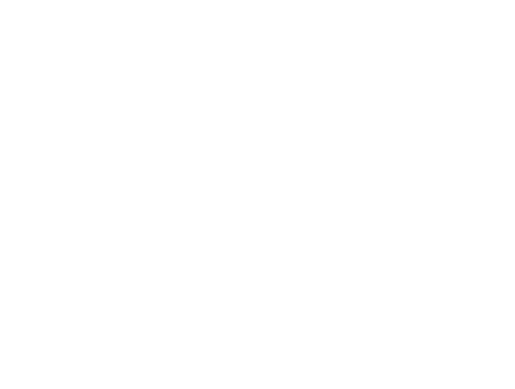

8×9 Array{Any,2}:
 "a"  NaN           0.0         0.0         0.0         0.0         0.0         0.0         0.0
 "b"    0.333333  NaN           0.0         0.0         0.0         0.0         0.0         0.0
 "c"    0.333333    0.111111  NaN           0.0         0.0         0.0         0.0         0.0
 "d"    0.666667    0.555556    0.555556  NaN           0.0         0.0         0.0         0.0
 "e"    0.222222    0.555556    0.555556    0.444444  NaN           0.0         0.0         0.0
 "f"    0.444444    0.222222    0.111111    0.0         0.333333  NaN           0.0         0.0
 "g"    0.444444    0.222222    0.222222    0.444444    0.666667    0.0       NaN           0.0
 "h"    0.444444    0.0         0.0         0.666667    0.666667    0.333333    0.222222  NaN

In [57]:
# make a nice table with color coding, highlighting directions that have and don't have significant differences from each other

fig, ax = subplots()

# Hide axes because there isn't a plot to go with it
ax.axis("off")

results_table = convert(Matrix, aggregate_results)
# the_table = table(results_table, colLabels=names(aggregate_results))

# the_table.get_celld()[(1,0)].set_facecolor("#56b5fd")

# colormap = PyPlot.matplotlib.cm.get_cmap("bwr")

# for i in range(1, stop=8)
#     for j in range(1, stop=9)
#         val = aggregate_results[i,j]
        
#         if typeof(val) == String
#             c = "xkcd:grey blue"
#         elseif isnan(val)
#             c = "xkcd:dark grey"
#         else
#             c = colormap(val)
#         end
        
#         the_table.get_celld()[(i-1,j-1)].set_facecolor(c)
#     end
# end


![Avg Asterisk](./pics/avgd_2v2_3subs_n.jpg)

# Clustering for Symmetry

In [58]:
using Clustering

# use kmeans or hierarchical clustering single linkage?

In [59]:
test = [1, 2, 3, 4, 5]
t = 2
i = findall(x->x!=t, test)

4-element Array{Int64,1}:
 1
 3
 4
 5